In [1]:
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import wordnet as wn
import gensim.downloader as api
from gensim.matutils import unitvec
from nltk.cluster import KMeansClusterer, cosine_distance, euclidean_distance
from sklearn.manifold import TSNE

In [2]:
nltk.download("stopwords")
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yutorse/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/yutorse/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

# データセットの準備

In [3]:
import os

path = get_ipython().run_line_magic('pwd', '')
path = os.path.join(path, "BBC News Summary/Summaries/")
directory_list = ['business', 'entertainment', 'politics', 'sport', 'tech']

documents = []
true_clusters = []
for i, directory in enumerate(directory_list):
    for filename in os.listdir(path + directory):
        with open(path + directory + "/" + filename, "r") as f:
            documents.append(f.read())
            true_clusters.append(i)

# 文書データの前処理

In [4]:
nltk.download("stopwords")
stop_words = nltk.corpus.stopwords.words("english")

def preprocess_word(word):
    word = word.lower()
    if word in ["",",","."]:
        return None
    if word in stop_words:
        return None
    lemma = wn.morphy(word)
    if lemma is None:
        return None
    elif lemma in stop_words:
        return None
    else:
        return lemma

def preprocess_document(document):
    words = nltk.word_tokenize(document)
    words = [preprocess_word(word) for word in words]
    words = [word for word in words if word is not None]
    return words

def preprocess_documents(documents):
    return [preprocess_document(document) for document in documents]


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yutorse/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# word2vec

In [5]:
model = api.load("word2vec-google-news-300")

In [6]:
def doc2vec(preprocessed_document):
    document_vec = np.mean(
        [model.get_vector(word, norm=True) for word in preprocessed_document if word in model], axis=0)
    return unitvec(document_vec)

def docs2vecs(preprocessed_documents):
    return [doc2vec(preprocessed_document) for preprocessed_document in preprocessed_documents]

preprocessed_documents = preprocess_documents(documents)
document_vectors = docs2vecs(preprocessed_documents)

In [7]:
tsne = TSNE(n_components=2)
reduced_document_vectors = tsne.fit_transform(np.array(document_vectors))

# クラスタリング

## cos類似度

In [8]:
n_clusters = 5
kmeans = KMeansClusterer(n_clusters, cosine_distance, avoid_empty_clusters=True, conv_test=1e-4, repeats=10)
clusters = kmeans.cluster(docs2vecs(preprocessed_documents), assign_clusters=True)

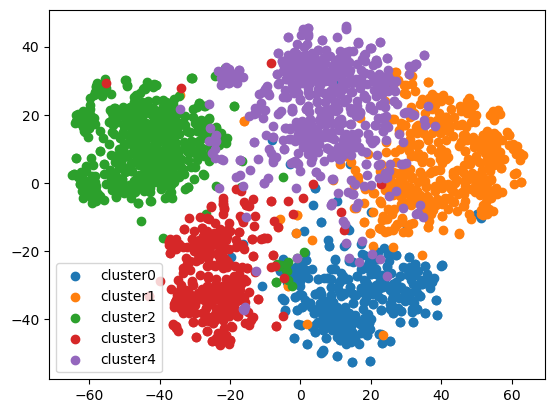

In [9]:
labeled_reduced_document_vectors = np.concatenate((np.array(reduced_document_vectors), np.array(clusters).reshape(-1,1)), axis=1)
for i in range(n_clusters):
    plt.scatter(labeled_reduced_document_vectors[labeled_reduced_document_vectors[:,2] == i,0], labeled_reduced_document_vectors[labeled_reduced_document_vectors[:,2] == i, 1], label=f'cluster{i}')
plt.legend()
plt.show()

In [10]:
n_clusters = 10
kmeans = KMeansClusterer(n_clusters, cosine_distance, avoid_empty_clusters=True, conv_test=1e-4, repeats=10)
clusters = kmeans.cluster(docs2vecs(preprocessed_documents), assign_clusters=True)

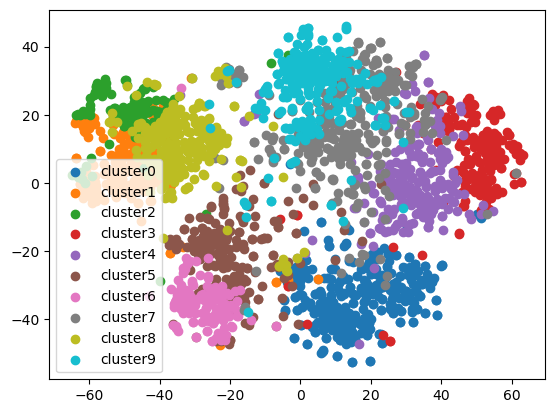

In [11]:
labeled_reduced_document_vectors = np.concatenate((np.array(reduced_document_vectors), np.array(clusters).reshape(-1,1)), axis=1)
for i in range(n_clusters):
    plt.scatter(labeled_reduced_document_vectors[labeled_reduced_document_vectors[:,2] == i,0], labeled_reduced_document_vectors[labeled_reduced_document_vectors[:,2] == i, 1], label=f'cluster{i}')
plt.legend()
plt.show()

## ユークリッド距離

In [12]:
n_clusters = 5
kmeans = KMeansClusterer(n_clusters, euclidean_distance, avoid_empty_clusters=True, conv_test=1e-4, repeats=10)
clusters = kmeans.cluster(docs2vecs(preprocessed_documents), assign_clusters=True)

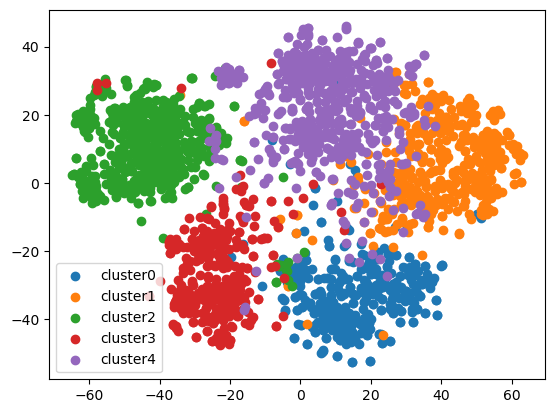

In [13]:
labeled_reduced_document_vectors = np.concatenate((np.array(reduced_document_vectors), np.array(clusters).reshape(-1,1)), axis=1)
for i in range(n_clusters):
    plt.scatter(labeled_reduced_document_vectors[labeled_reduced_document_vectors[:,2] == i,0], labeled_reduced_document_vectors[labeled_reduced_document_vectors[:,2] == i, 1], label=f'cluster{i}')
plt.legend()
plt.show()

In [14]:
n_clusters = 10
kmeans = KMeansClusterer(n_clusters, euclidean_distance, avoid_empty_clusters=True, conv_test=1e-4, repeats=10)
clusters = kmeans.cluster(docs2vecs(preprocessed_documents), assign_clusters=True)

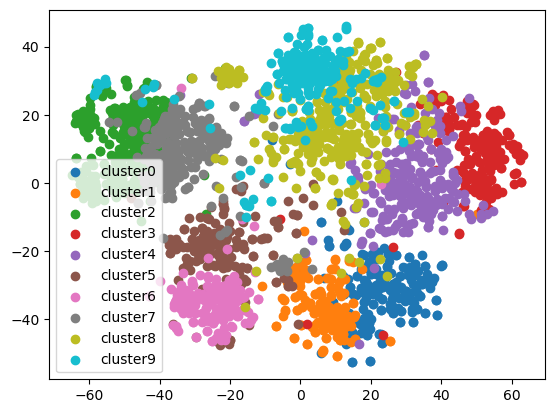

In [15]:
labeled_reduced_document_vectors = np.concatenate((np.array(reduced_document_vectors), np.array(clusters).reshape(-1,1)), axis=1)
for i in range(n_clusters):
    plt.scatter(labeled_reduced_document_vectors[labeled_reduced_document_vectors[:,2] == i,0], labeled_reduced_document_vectors[labeled_reduced_document_vectors[:,2] == i, 1], label=f'cluster{i}')
plt.legend()
plt.show()

# 正解ラベルによるクラスタの可視化

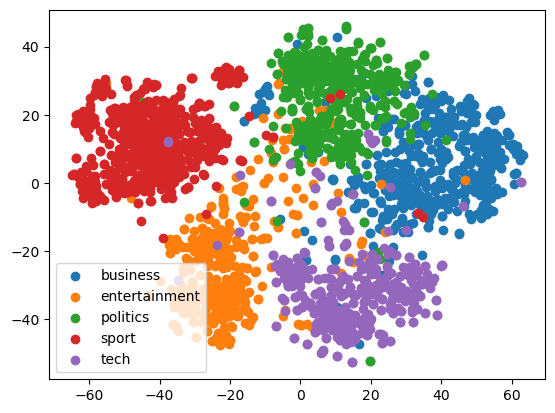

In [16]:
topic_list = ['business', 'entertainment', 'politics', 'sport', 'tech']
labeled_reduced_document_vectors = np.concatenate((np.array(reduced_document_vectors), np.array(true_clusters).reshape(-1,1)), axis=1)
for i in range(5):
    plt.scatter(labeled_reduced_document_vectors[labeled_reduced_document_vectors[:,2] == i,0], labeled_reduced_document_vectors[labeled_reduced_document_vectors[:,2] == i, 1], label=topic_list[i])
plt.legend()
plt.show()